# Regresión lineal simple: Ajuste por mínimos cuadrados
M2U1 - Ejercicio 1

## ¿Qué vamos a hacer?
- Importar datasets en el entorno de trabajo
- Ajustar una regresión lineal simple por mínimos cuadrados de forma manual
- Resolver dicha regresión usando funciones matemáticas de Numpy
- Visualizar la regresión con Matplotlib

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Tarea 1: Importar datasets

Para este ejercicio debemos importar el siguiente datasets al entorno local, que usamos en un ejercicio anterior y estará disponibles en dicha unidad:
- [M1U1-2-dataset_tarea2.csv](https://github.com/Tokio-School/Machine-Learning/blob/main/M01-Introducci%C3%B3n_al_Machine_Learning/M1U1-Introducci%C3%B3n_al_big_data_y_ML/M1U1-2-dataset_tarea2.csv)

En función de tu entorno de trabajo, tendrás que seguir pasos diferentes para importarlo. Puedes importarlo tanto en Google Colab como en tu VM o entorno local, usando la interfaz de JupyterLab o usando las funcionalidades de tu entorno.
Como los entornos son tan diferentes, no incluimos instrucciones paso a paso para ello, pero no debes tener dificultad ninguna para hacerlo :).

Tómate este tiempo para familiarizarte con tu entorno de trabajo y descubrir las opciones para importar datasets localmente.

In [92]:
# Conectamos el drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Tarea 2: Ajustar la regresión lineal simple por mínimos cuadrados

Para esta tarea, vamos a ajustar la regresión paso a paso, calculando cada valor con Numpy para familiarizarnos con sus funciones.

**Nota:** Vamos a utilizar únicamente la función de suma de Numpy. En la siguiente tarea usaremos las funciones para calcular directamente la media de un array, desviaciones típicas o covarianza.

In [93]:
import numpy as np

### Importar el datasets en Numpy

Ejecuta la siguiente celda para importar el dataset com un array de Numpy, asegurándote de que el nombre del dataset es correcto y que el archivo se encuentra en el mismo directorio que el notebook.

*NOTA:* Si utilizas Google Colab, utiliza estos métodos para subir el archivo desde local o Google Drive: [External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)

In [94]:
import csv

with open("/content/drive/MyDrive/ML/Archivos Pandas-Matplotlib-Numpy/Practica 4/M1U1-2-dataset_tarea2.csv") as csvfile:
    read_csv = list(csv.reader(csvfile))

# Eliminar cabecera
read_csv = read_csv[1:]

# Cambiar el caracter de coma decimal a puntos
for line in read_csv:
    for i in [0, 1]:
        line[i] = line[i].replace(',', '.')


# Cargar como array de Numpy
dataset = np.asarray(read_csv).astype(np.float64)

print(dataset)

[[  0.    34.64]
 [  2.    25.59]
 [  4.    28.52]
 [  6.    40.42]
 [  8.    11.12]
 [ 10.    61.2 ]
 [ 12.    44.1 ]
 [ 14.    73.33]
 [ 16.    56.14]
 [ 18.    57.83]
 [ 20.    50.74]
 [ 22.    90.15]
 [ 24.   100.63]
 [ 26.    83.65]
 [ 28.   103.47]
 [ 30.    89.48]
 [ 32.   128.12]
 [ 34.   140.35]
 [ 36.   137.97]
 [ 38.   122.06]
 [ 40.   118.24]
 [ 42.   146.39]
 [ 44.   138.15]
 [ 46.   158.85]
 [ 48.   135.65]
 [ 50.   187.84]]


Ya disponemos de los datos en un array 2D de Numpy.

Ahora, completa el código de las siguientes celdas para ajustar la regresión lineal:

In [95]:
## TODO: Crea 2 arrays 1D a partir del dataset importado que correspondan a las columnas X e Y del CSV

X = np.array(dataset[:,0])
Y = np.array(dataset[:,1])
print(f"array X:\n{X}")
print(f"array Y:\n{Y}")



array X:
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]
array Y:
[ 34.64  25.59  28.52  40.42  11.12  61.2   44.1   73.33  56.14  57.83
  50.74  90.15 100.63  83.65 103.47  89.48 128.12 140.35 137.97 122.06
 118.24 146.39 138.15 158.85 135.65 187.84]


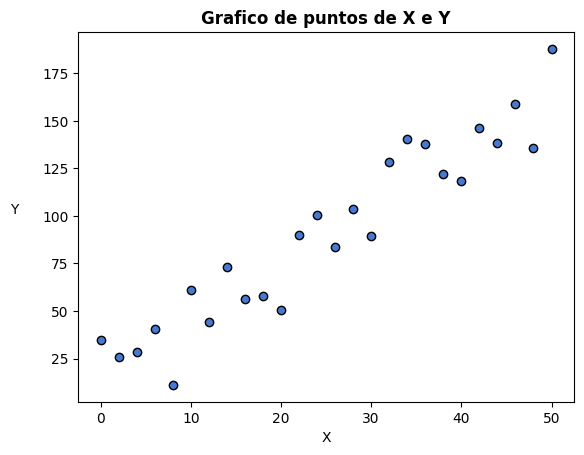

In [96]:
## TODO: Antes de entrenar el modelo, representa los datos en una gráfica de puntos de Matplotlib

import matplotlib.pyplot as plt

# Puedes usar la función scatter()
plt.scatter(X,Y, edgecolors= "black")
plt.style.use("seaborn-v0_8-muted")
plt.title("Grafico de puntos de X e Y", fontweight="bold")
plt.xlabel("X")
plt.ylabel("Y", rotation=0, labelpad=20)
plt.show()

Recuerda las ecuaciones de la regresión lineal:

$$Y=m \times X + b$$

$$m=\frac{\sum XY - \frac{(\sum X)(\sum Y)}{n}}{\sum X^2-\frac{(\sum X)^2}{n}}$$

$$b=\overline{Y} - m \times \overline{X}$$

In [97]:
## TODO: Calcula m usando la función np.sum(ndarray) o ndarray.sum(), donde ndarray es el array a sumar
n = len(Y)


# Recuerda, es una multiplicación de vectores elemento-a-elemento. Usa la función np.multiply()

XY = np.multiply(X,Y)
X2 = X**2
sum_X = np.sum(X)
sum_Y = np.sum(Y)
sum_XY= np.sum(XY)
sum_X2 = np.sum(X2)



m = (sum_XY - (sum_X * sum_Y) / n) / (sum_X2 - (sum_X**2) / n)

print("La pendiente m es:", m)


La pendiente m es: 2.9575196581196566


In [98]:
## TODO: Calcula b

# TODO: Sustituye "sum_y" y "sum_x" por el código o variables correspondientes
y_avg = sum_Y / n
x_avg = sum_X / n

b = y_avg - m * x_avg
print("El intercepto b es:", b)


El intercepto b es: 17.00931623931629


Evalúa el modelo calculando su R<sup>2</sup>.

Recuerda las ecuaciones para calcular el coeficiente de correlación:

$$R^2 = \frac{\sigma_{XY}}{\sigma_X \cdot \sigma_Y};$$

$$S_{XY} = \frac{1}{n - 1} [\sum_{i = 1}^{n}{x_i y_i - \bar{x}\bar{y}}]$$

$$\sigma_X = \sqrt{\frac{\sum X^2}{n} - \bar{X}^2};$$

$$\sigma_Y = \sqrt{\frac{\sum Y^2}{n} - \bar{Y}^2}$$

*Nota:* Utilizaremos una fórmula para la covarianza ligeramente diferente de la utilizada en ejercicios anteriores.

In [99]:
## TODO: Calcula R**2

x_std = np.std(X)
y_std = np.std(Y)
cov_xy = np.cov(X, Y)[0, 1]

r2 = (cov_xy / (x_std * y_std)) ** 2
print("El valor de R^2 es:", r2)


El valor de R^2 es: 0.972125093163954


Calcula las predicciones de Y como *y_pred* para los valores de X originales, con los coeficientes del modelo ajustado:

$y\_pred = m \times X + b$

In [100]:
## TODO: Calcula y_pred
y_pred = m * X + b
print(y_pred)

[ 17.00931624  22.92435556  28.83939487  34.75443419  40.6694735
  46.58451282  52.49955214  58.41459145  64.32963077  70.24467009
  76.1597094   82.07474872  87.98978803  93.90482735  99.81986667
 105.73490598 111.6499453  117.56498462 123.48002393 129.39506325
 135.31010256 141.22514188 147.1401812  153.05522051 158.97025983
 164.88529915]


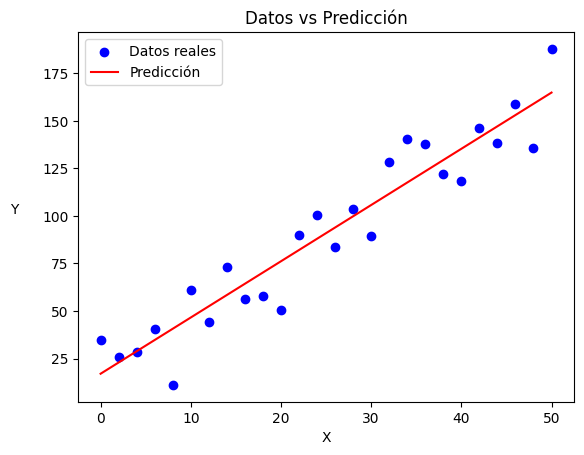

In [101]:
# TODO: Representa con Matplotlib una gráfica con 2 series en colores diferentes: Y vs X, y_pred vs X
# Usa una gráfica de puntos para Y vs X y una gráfica de líneas para y_pred vs X

fig, ax = plt.subplots()
ax.scatter(X, Y, color="blue", label="Datos reales")
ax.plot(X, y_pred, color="red", label="Predicción")
ax.set_xlabel("X")
ax.set_ylabel("Y", rotation=0, labelpad=20)
ax.set_title("Datos vs Predicción")

ax.legend()

plt.show()

## Tarea 3: Ajustar la regresión lineal usando las funciones matemáticas de Numpy

Ahora, repite los pasos anteriores para ajustar la regresión lineal aprovechando todas las capacidades de Numpy, sus funciones para calcular las suma, media, desviación típica y covarianza de arrays.

In [102]:
## TODO: Resuelve la regresión lineal con las funciones avanzadas de Numpy
## Usa nuevos nombres de variables como np_x_avg, np_x_std, np_r2, etc.

# Medias y desviaciones
np_x_avg = np.mean(X)
np_y_avg = np.mean(Y)
np_x_std = np.std(X)
np_y_std = np.std(Y)

# Pendiente y ordenada
np_m = (np.matmul(X - np_x_avg, Y - np_y_avg)) / np.matmul(X - np_x_avg, X - np_x_avg)
np_b = np_y_avg - np_m * np_x_avg

# Coeficiente de determinación R^2
np_r2 = (np.corrcoef(X, Y)[0, 1])**2

print("Pendiente np_m:", np_m)
print("Ordenada np_b:", np_b)
print("R^2 np_r2:", np_r2)


Pendiente np_m: 2.957519658119658
Ordenada np_b: 17.009316239316263
R^2 np_r2: 0.8987842947151938


## Tarea 4: Calcula los residuos y realiza predicciones

Calcula los residuos de tu modelo:

$residuos = Y - Y\_pred$

Text(0.5, 1.0, 'Residuos vs Valores')

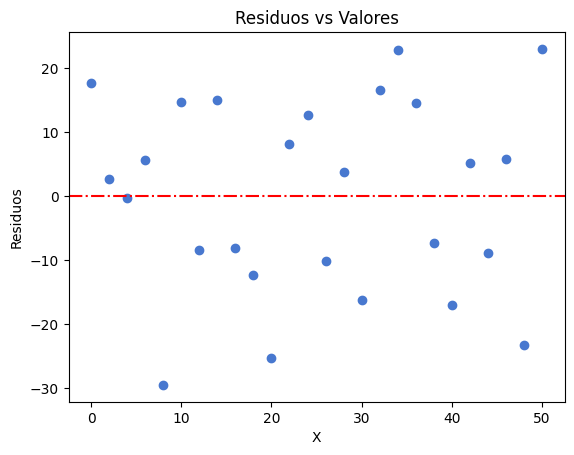

In [103]:
## TODO: Calcula los residuos y represéntalos con Matplotlib en una gráfica de puntos vs X


fig, ax = plt.subplots()
ax.scatter(X, res)
ax.axhline(0, color="red", linestyle="-.")
ax.set_xlabel("X")
ax.set_ylabel("Residuos")
ax.set_title("Residuos vs Valores")


Realiza predicciones para 2 (o más) valores nuevos de X, 1 valor para interpolación y 1 valor para extrapolación.

> Añadir blockquote



In [104]:
# TODO: Realiza predicciones con el modelo ajustado

x_interpol = 10
y_interpol = m * x_interpol + b

x_extrapol = 100
y_extrapol = m * x_extrapol + b

Representa gráficamente las predicciones sobre los valores de entrenamiento

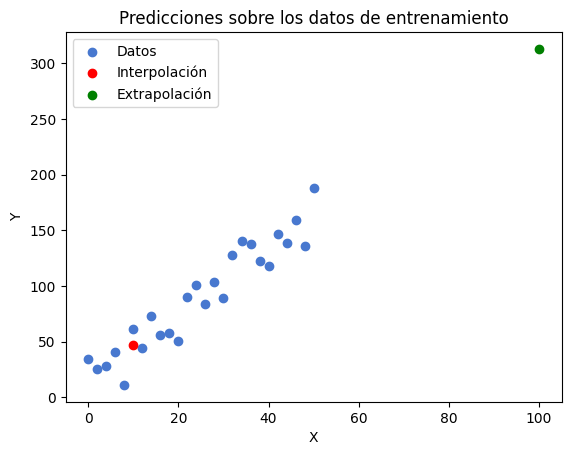

In [105]:
# TODO: Representa las predicciones como puntos de una serie diferente sobre la nube de puntos Y vs X de entrenamiento

fig,ax = plt.subplots()
ax.scatter(X, Y, label="Datos")
ax.scatter(x_interpol, y_interpol, color="red", label="Interpolación")
ax.scatter(x_extrapol, y_extrapol, color="green", label="Extrapolación")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Predicciones sobre los datos de entrenamiento")
ax.legend()
plt.show()



## Tarea 5: Resolución con Scikit-learn

*¿Te atreves a resolver una regresión lineal simple usando Scikit-learn? ¿Y a evalularla y realizar predicciones?*

Revisa el código de este notebook y adáptalo para usar nuestros datos: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [106]:
# TODO: Resuelve la regresión lineal simple usando Scikit-learn a partir de dicho ejemplo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = dataset[:, 0].reshape(-1, 1)  # reshape para que sea 2D
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=19)
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print(f"Mean Squared Error (MSE):{mean_squared_error(y_test, y_pred)}")
print(f"R^2 score:{r2_score(y_test, y_pred)}")
print("Coeficiente (pendiente):", regressor.coef_[0])
print("Intercepto:", regressor.intercept_)




Mean Squared Error (MSE):299.8281872145017
R^2 score:0.7999338454406368
Coeficiente (pendiente): 2.83728789323165
Intercepto: 21.10368446139178


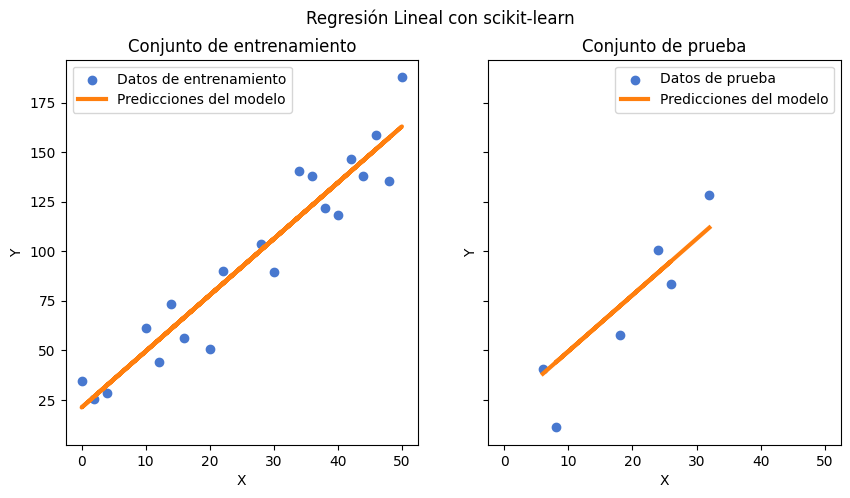

In [107]:
# Graficos

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

# Conjunto de entrenamiento
ax[0].scatter(X_train, y_train, label="Datos de entrenamiento")
y_train_pred = regressor.predict(X_train)
ax[0].plot(
    X_train,
    y_train_pred,
    linewidth=3,
    color="tab:orange",
    label="Predicciones del modelo",
)
ax[0].set(xlabel="X", ylabel="Y", title="Conjunto de entrenamiento")
ax[0].legend()

# Conjunto de prueba
ax[1].scatter(X_test, y_test, label="Datos de prueba")
ax[1].plot(
    X_test,
    y_pred,
    linewidth=3,
    color="tab:orange",
    label="Predicciones del modelo",
)
ax[1].set(xlabel="X", ylabel="Y", title="Conjunto de prueba")
ax[1].legend()

fig.suptitle("Regresión Lineal con scikit-learn")
plt.show()


